../data/000300.SH/000300.SH.csv ===============
Factors Shape: (2671, 10) (2671, 48)
----- start:  0
---- Trend Distribution Check --------
0.0     960
1.0     558
2.0    1153
dtype: int64
input data shape:  (2671, 48)
input label shape:  (2671,)
training size:  2380
testing size:  280
Train on 2380 samples, validate on 280 samples
Epoch 1/100
2380/2380 [==============================] - 4s - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 2/100
2380/2380 [==============================] - 1s - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0943 - val_mean_squared_error: 0.0943
Epoch 3/100
2380/2380 [==============================] - 1s - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0923 - val_mean_squared_error: 0.0923
Epoch 4/100
2380/2380 [==============================] - 1s - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0916 - val_mean_squared_error: 0.0916
Epoch 5/100
2380/2380 [===================

2380/2380 [==============================] - 1s - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 52/100
2380/2380 [==============================] - 1s - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 53/100
2380/2380 [==============================] - 1s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 54/100
2380/2380 [==============================] - 1s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 55/100
2380/2380 [==============================] - 1s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 56/100
2380/2380 [==============================] - 1s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 57/100
2380/2380 [==============================] - 1s - loss: 0.

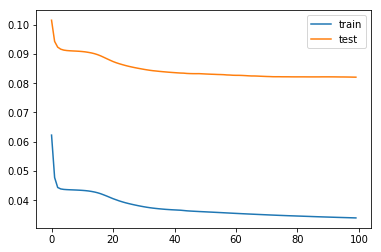

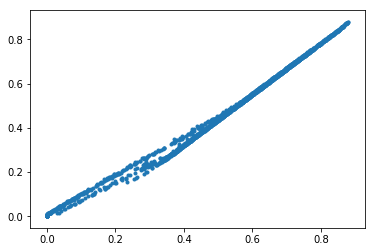

Train on 2380 samples, validate on 280 samples
Epoch 1/100
2380/2380 [==============================] - 4s - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.1029 - val_mean_squared_error: 0.1029
Epoch 2/100
2380/2380 [==============================] - 1s - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 3/100
2380/2380 [==============================] - 1s - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0926 - val_mean_squared_error: 0.0926
Epoch 4/100
2380/2380 [==============================] - 1s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0918 - val_mean_squared_error: 0.0918
Epoch 5/100
2380/2380 [==============================] - 1s - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 6/100
2380/2380 [==============================] - 1s - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 7/100
2380/

2380/2380 [==============================] - 1s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 53/100
2380/2380 [==============================] - 1s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 54/100
2380/2380 [==============================] - 1s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 55/100
2380/2380 [==============================] - 1s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 56/100
2380/2380 [==============================] - 1s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 57/100
2380/2380 [==============================] - 1s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 58/100
2380/2380 [==============================] - 1s - loss: 0.

TypeError: plot() missing 1 required positional argument: 'ys'

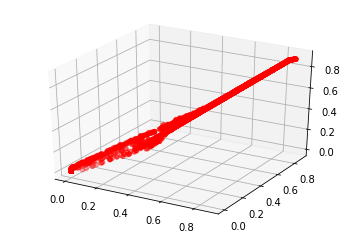

In [38]:
'''
Construct an AutoEncoder for sequence data based on LSTM
'''
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras import metrics

'''
Preparing data
'''
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import math

'''
读入一支股票指定年份的ohlcv数据
输入:baseDir,stockCode为字符, startYear,yearNum为整数，
输出:dataframe
'''
def readWSDFile(baseDir, stockCode, startYear, yearNum=1, usecols=None, 
                names=['date','pre_close','open','high','low','close','change','chg_range',
                                               'volume','amount','turn']):
    # 解析日期
    filename = baseDir+stockCode+'/'+stockCode+'.csv'
    print (filename, "===============")
    dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d').date()
    df = pd.read_csv(filename, index_col=0, sep=',', header=None,usecols=usecols,
                            skiprows=1, names=names,
                           parse_dates=True, date_parser=dateparse)
    return df['2005-01-04':'2015-12-31']

'''
读入一支股票指定年份的技术指标
输入:baseDir,stockCode为字符, startYear,yearNum为整数，
输出:dataframe
'''
def readWSDIndexFile(baseDir, stockCode, startYear, yearNum=1):
    # 解析日期
    dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d').date()

    df = 0
    for i in range(yearNum):
        tempDF = pd.read_csv(baseDir+'I'+stockCode+'/wsd_'+stockCode+'_'+str(startYear+i)+'.csv', index_col=0, sep=',', parse_dates=True, date_parser=dateparse
                             # , usecols=usecols
                             )
        if i==0: df = tempDF
        else: df = df.append(tempDF)
    return df

# 整理好多因子输入，以dataframe返回数据+标签
from sklearn import preprocessing
def data_prepare(retrace = 0.618):
    # prepare data
    baseDir = '../data/'
    stockCodes = ['000300.SH']
    i = 0
    startYear = 2005
    number =11
    usecols = None#[0,5,6]
    names = ['date','close','change']
    df = readWSDFile(baseDir, stockCodes[i], startYear, number, usecols)
    dfi = readWSDIndexFile(baseDir, stockCodes[i], startYear, number)
    allDF = pd.concat([df, dfi], axis=1)
    sample_num = np.shape(df)[0]
    labelDF = pd.Series(np.zeros(sample_num))
    print ("Factors Shape:", np.shape(df), np.shape(allDF))
    
    # 求出 trend
    price = df['close']
    start = 0
    while price[start] > price[start+1]:
        labelDF[start] = 1 #flat
        start +=1
    print("----- start: ",start)
    #find peak, find trough, calculate retracement and label trend accordingly
    i = start
    while i < sample_num - 1:
        cursor = i
        while cursor < sample_num - 1 and price[cursor] <= price[cursor+1]:
            cursor += 1
        peak = cursor
        while cursor < sample_num - 1 and price[cursor] >= price[cursor+1]:
            cursor += 1
        trough = cursor
        retracement = (price[peak] - price[trough]) / (price[peak] - price[i])
        mark = 1 # flat
        if retracement < retrace:
            mark = 2 # UP
        elif retracement > 1 + retrace:
            mark = 0 # DOWN
        for k in range(i, cursor+1):
            labelDF[k] = mark
        i = cursor

    print("---- Trend Distribution Check --------")
    print(labelDF.value_counts().sort_index())
    
    # make a deep copy of Price Difference before normalizing
    priceDF = allDF['change'].copy(deep=True)
    # scikit-learn normalize or: keras.utils.normalize(x)
    scaler = preprocessing.MinMaxScaler()
    input_data = scaler.fit_transform(allDF)
    print ("input data shape: ", np.shape(input_data)) #  days *  factors
    print ("input label shape: ", np.shape(labelDF))
   
    return input_data, labelDF, priceDF, price # train/test data, labels and prices for yield calucluation

###### Hyper paramters #########
time_steps = 2
batch_size = 20 # specify batch size explicitly; no shuffle but successive sequence
n_epoch = 100
train_ratio = 0.9

dataset,labels, priceDF, price = data_prepare()
segment_num = (len(dataset) - time_steps - 1) // batch_size # rollingly use data
train_size = int(segment_num * train_ratio)
test_size = segment_num - train_size
data_dim = np.shape(dataset)[1] + 1 #input + historic labels

#divide training/validation dataset; numpy array
train_x = dataset[0 : train_size * batch_size + time_steps]
test_x = dataset[train_size * batch_size : (train_size + test_size) * batch_size + time_steps]

#historic label as input time series
train_historic_label = np.array(labels.iloc[0 : train_size * batch_size + time_steps]).reshape(-1,1)
test_historic_label = np.array(labels.iloc[train_size * batch_size : (train_size + test_size) * batch_size + time_steps]).reshape(-1,1)

#Sliding window: label is just 1 step further after sequence data
train_y = labels.iloc[time_steps : train_size * batch_size + time_steps]
test_y = labels.iloc[train_size * batch_size + time_steps: (train_size + test_size) * batch_size + time_steps]

# add columns 
train_x = np.concatenate((train_x, train_historic_label), axis = 1)
train_sample = len(train_x) - time_steps
b = np.array([[]])

# creating data in a rolling window view 
for i in range(train_sample):
    b = np.append(b, train_x[i : time_steps + i])
train_x = b.reshape(train_sample, time_steps, data_dim)
print("training size: ", train_sample)

test_x = np.concatenate((test_x, test_historic_label), axis = 1)
test_sample = len(test_x) - time_steps
b = np.array([[]])
for i in range(test_sample):
    b = np.append(b, test_x[i : time_steps + i])
test_x = b.reshape(test_sample, time_steps, data_dim)
print("testing size: ", test_sample)

train_y = np.array(train_y, dtype=np.int32)
test_y = np.array(test_y, dtype=np.int32)

############## MODEL ##########################
activations = ['sigmoid', 'hard_sigmoid', 'linear', 'relu', 'tanh']
latent_dim = 3
layer1 = 32
layer2 = 16
for act in activations:
    inputs = Input(shape=(time_steps, data_dim))
    encoded = LSTM(units = layer1, activation = act, return_sequences = True)(inputs)
    encoded = LSTM(units = layer2, activation = act, return_sequences = True)(encoded)
    encoded = LSTM(units = latent_dim, activation = act, return_sequences = False)(encoded) # most hidden layer, only preseve the last step's output

    repeated_out = RepeatVector(time_steps)(encoded)  # repeat intermediate output [2D -> 3D]

    decoded = LSTM(layer2, activation = act, return_sequences=True)(repeated_out)
    decoded = LSTM(layer1, activation = act, return_sequences=True)(decoded)
    decoded = LSTM(data_dim, activation = act, return_sequences=True)(decoded)  # output layer as a comparison

    sequence_autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)  ## encoder for dimensionality reduction

    sequence_autoencoder.compile(optimizer='rmsprop', 
                                 loss='mean_squared_error',
                                 metrics=['mse'])
    history = sequence_autoencoder.fit(x = train_x, y = train_x, 
                             batch_size=batch_size,
                             epochs=n_epoch,
                             shuffle=False,
                             validation_data = (test_x, test_x))
    print ("Params: ", "time_steps:", time_steps, " latent_dim:", 
           latent_dim, " batch_size: ",batch_size, " n_epoch: ", n_epoch, 'layer1', layer1, 'layer2',layer2)

    # encoder.save('autoencoder-49d-8ts-100ep-24-12-8.h5')
    compressed_data = encoder.predict(train_x)

    # plot history
    plt.plot(history.history['mean_squared_error'], label='train')
    plt.plot(history.history['val_mean_squared_error'], label='test')
    plt.legend()
    plt.show()
    plt.savefig(act+'-loss.png')
    # loss
#     plt.plot(history.history['loss'], label='val_loss')
#     plt.plot(history.history['val_loss'], label='val_loss')
#     plt.legend()
#     plt.show()

    ## drawing compressed data
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1],marker='.')
    plt.show()
    plt.savefig(act+'-2d.png')
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(compressed_data[:, 0], compressed_data[:, 1], compressed_data[:,2],marker='o', c= 'r')
    plt.savefig(act+'-3d.png')

In [40]:
history.history

{'loss': [0.063893653076736862,
  0.048445329109222446,
  0.044612497873917349,
  0.044076809448291773,
  0.043925514209921621,
  0.043844946558360291,
  0.043776820734644138,
  0.043702910482069528,
  0.043615581757318569,
  0.043509346010366906,
  0.043370770533107408,
  0.043187386583255119,
  0.04293991405391643,
  0.042607938534259295,
  0.042193366050281948,
  0.041715529309037852,
  0.041207561840718034,
  0.040748209395140657,
  0.040315882881962452,
  0.039942165249723847,
  0.039612356620300715,
  0.03933911388661681,
  0.039101839425558803,
  0.038875644744819957,
  0.038668143758628551,
  0.03847839488420917,
  0.038295667782864147,
  0.038093909276884143,
  0.037872744786764397,
  0.037707092443935011,
  0.037558953762993591,
  0.037412592100308222,
  0.037275954470539295,
  0.037156851891772584,
  0.037048378137542921,
  0.036947919588003843,
  0.036844376012870744,
  0.036748622904116866,
  0.036659376492269899,
  0.036580410073785222,
  0.036506878951673996,
  0.0364390

In [29]:
# # visualize low-dim data
from sklearn import manifold
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
Y = tsne.fit_transform(compressed_data)
ax = fig.add_subplot(222, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:,2],marker='o',cmap=plt.cm.Spectral) 
plt.show()

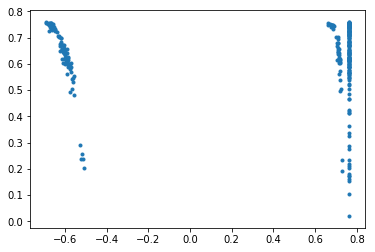

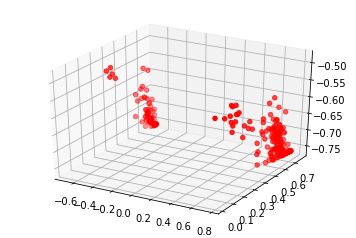

In [24]:
compressed_data = encoder.predict(test_x)
plt.scatter(compressed_data[:, 0], compressed_data[:, 1],marker='.')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(compressed_data[:, 0], compressed_data[:, 1], compressed_data[:,2],marker='o', c= 'r')